# Guitar Tuning Filters

* Design Band-Pass Filters using Guitar Frequecies
* E2, A2, D3, G3, B3 and E4

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

* Number of FIR taps
* Nyquist Frequency

In [11]:
numtaps = 255
fs = 44100.
nyq = fs/2

## Defining the band of FIRs
* Define bands and calcutate the coefficients

In [12]:
delta = 1
cutoff_freq = {"e2":82,"a2":110,"d3":146,"g3":196,"b3":247,"e4":330}
band_e2 = [cutoff_freq["e2"]-delta,cutoff_freq["e2"]+delta]
band_a2 = [cutoff_freq["a2"]-delta,cutoff_freq["a2"]+delta]
band_d3 = [cutoff_freq["d3"]-delta,cutoff_freq["d3"]+delta]
band_g3 = [cutoff_freq["g3"]-delta,cutoff_freq["g3"]+delta]
band_b3 = [cutoff_freq["b3"]-delta,cutoff_freq["b3"]+delta]
band_e4 = [cutoff_freq["e4"]-delta,cutoff_freq["e4"]+delta]

b_e2 = sig.firwin(numtaps, band_e2, nyq=nyq, pass_zero=False)
b_a2 = sig.firwin(numtaps, band_a2, nyq=nyq, pass_zero=False)
b_d3 = sig.firwin(numtaps, band_d3, nyq=nyq, pass_zero=False)
b_g3 = sig.firwin(numtaps, band_g3, nyq=nyq, pass_zero=False)
b_b3 = sig.firwin(numtaps, band_b3, nyq=nyq, pass_zero=False)
b_e4 = sig.firwin(numtaps, band_e4, nyq=nyq, pass_zero=False)

## Number of bits and normalization

In [13]:
nBits = 15
max_val = 2**(nBits) - 1

# Normalizacao dos coeficientes
bn_e2 = b_e2/ np.max(np.abs(b_e2))
bn_a2 = b_a2/ np.max(np.abs(b_a2))
bn_d3 = b_d3/ np.max(np.abs(b_d3))
bn_g3 = b_g3/ np.max(np.abs(b_g3))
bn_b3 = b_b3/ np.max(np.abs(b_b3))
bn_e4 = b_e4/ np.max(np.abs(b_e4))

## Plotting the sync response of each filter

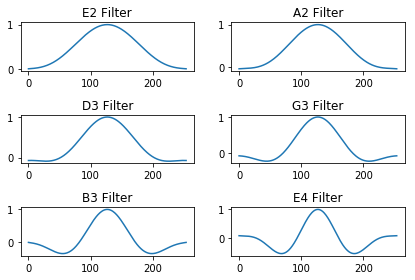

In [14]:
plt.subplot(321)
plt.plot(bn_e2)
plt.title("E2 Filter")

plt.subplot(322)
plt.plot(bn_a2)
plt.title("A2 Filter")

plt.subplot(323)
plt.plot(bn_d3)
plt.title("D3 Filter")

plt.subplot(324)
plt.plot(bn_g3)
plt.title("G3 Filter")

plt.subplot(325)
plt.plot(bn_b3)
plt.title("B3 Filter")

plt.subplot(326)
plt.plot(bn_e4)
plt.title("E4 Filter")

plt.tight_layout()
plt.show()


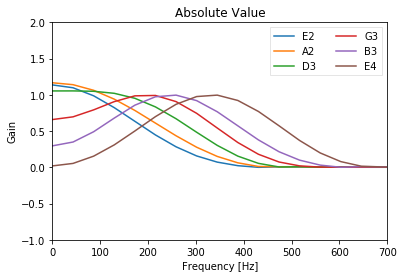

In [15]:
#wn, hn = sig.freqz(bn_e4/np.sum(bn_e4.astype(float))) # <= w <= frequencias, h <= resposta (numeros complexos)
w_e2, h_e2 = sig.freqz(b_e2)
w_a2, h_a2 = sig.freqz(b_a2)
w_d3, h_d3 = sig.freqz(b_d3)
w_g3, h_g3 = sig.freqz(b_g3)
w_b3, h_b3 = sig.freqz(b_b3)
w_e4, h_e4 = sig.freqz(b_e4)

plt.figure()
plt.axis([0,700,-1,2])
plt.title("Absolute Value")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain")
plt.plot(w_e2*nyq/(np.pi), np.abs(h_e2), label="E2")
plt.plot(w_a2*nyq/(np.pi), np.abs(h_a2), label="A2")
plt.plot(w_d3*nyq/(np.pi), np.abs(h_d3), label="D3")
plt.plot(w_g3*nyq/(np.pi), np.abs(h_g3), label="G3")
plt.plot(w_b3*nyq/(np.pi), np.abs(h_b3), label="B3")
plt.plot(w_e4*nyq/(np.pi), np.abs(h_e4), label="E4")

leg = plt.legend(loc='best', ncol=2, shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)

plt.show()

#plt.figure()
#plt.axis([0,1000,-140,50])
#plt.plot(w*nyq/(np.pi), 20*np.log10(np.abs(h))) # Plot em dB
#plt.plot(wn*nyq/(np.pi), 20*np.log10(np.abs(hn))) # Plot em dB
#plt.xlabel("Frequency [Hz]")
#plt.ylabel("Gain [dB]")
#plt.show()

## Getting FIR coefficients to apply in project
* Remember to change the coefficients you want in the print!!

In [16]:
bn_e2 *= max_val
bn_a2 *= max_val
bn_d3 *= max_val
bn_g3 *= max_val
bn_b3 *= max_val
bn_e4 *= max_val

# Conversao para inteiro
bn_e2 = bn_e2.astype(int)
bn_a2 = bn_a2.astype(int)
bn_d3 = bn_d3.astype(int)
bn_g3 = bn_g3.astype(int)
bn_b3 = bn_b3.astype(int)
bn_e4 = bn_e4.astype(int)

for i in bn_g3[:-1]:
    print(str(i) + ",", end="")
print(bn_g3[-1])

-2409,-2441,-2480,-2526,-2579,-2640,-2708,-2784,-2867,-2957,-3055,-3160,-3272,-3390,-3515,-3646,-3783,-3924,-4071,-4222,-4376,-4533,-4693,-4855,-5018,-5181,-5344,-5506,-5666,-5823,-5977,-6126,-6270,-6408,-6539,-6662,-6776,-6881,-6975,-7058,-7128,-7186,-7229,-7258,-7271,-7268,-7248,-7210,-7153,-7078,-6983,-6867,-6731,-6574,-6395,-6194,-5970,-5724,-5454,-5162,-4846,-4507,-4145,-3759,-3350,-2918,-2463,-1985,-1485,-964,-421,142,727,1331,1954,2595,3254,3930,4621,5328,6048,6781,7525,8280,9045,9818,10598,11384,12175,12969,13764,14561,15356,16149,16939,17724,18502,19273,20034,20785,21525,22251,22962,23657,24336,24996,25636,26255,26852,27426,27975,28499,28997,29467,29909,30321,30704,31056,31377,31665,31921,32144,32334,32489,32610,32697,32749,32767,32749,32697,32610,32489,32334,32144,31921,31665,31377,31056,30704,30321,29909,29467,28997,28499,27975,27426,26852,26255,25636,24996,24336,23657,22962,22251,21525,20785,20034,19273,18502,17724,16939,16149,15356,14561,13764,12969,12175,11384,10598,9818,